In [1]:
# Import library
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O
import matplotlib.pyplot as plt # plotting library
import seaborn as sns # visualization library based on matplotlib
from IPython.display import display # Manage multiple output per cell
import datetime
import sqlite3

In [2]:
# Import sickit methods
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score, log_loss, accuracy_score, roc_auc_score

In [3]:
# Import model
from sklearn.calibration import CalibratedClassifierCV
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
# Import and define deep learning model
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
def create_DNN_model(optimizer,nb_feature):
    model = Sequential()
    model.add(Dense(nb_feature, input_dim=nb_feature, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=optimizer)
    return model
def create_DNN_model_adam_all():
    return create_DNN_model('adam',184)
def create_DNN_model_adam_38():
    return create_DNN_model('adam',38)
def create_DNN_model_sgd_all():
    return create_DNN_model('SGD',184)
def create_DNN_model_sgd_56():
    return create_DNN_model('SGD',56)

Using TensorFlow backend.


In [5]:
# Define target
target = 'INFO_FTR_H'

In [6]:
# Define all different features dataset
raw_features = ["A_MEANS_FIVE_AC","A_MEANS_FIVE_AF","A_MEANS_FIVE_AR","A_MEANS_FIVE_AS","A_MEANS_FIVE_AST","A_MEANS_FIVE_AY","A_MEANS_FIVE_FTAG","A_MEANS_FIVE_FTHG","A_MEANS_FIVE_FTR_A","A_MEANS_FIVE_FTR_D","A_MEANS_FIVE_FTR_H","A_MEANS_FIVE_HC","A_MEANS_FIVE_HF","A_MEANS_FIVE_HR","A_MEANS_FIVE_HS","A_MEANS_FIVE_HST","A_MEANS_FIVE_HTAG","A_MEANS_FIVE_HTHG","A_MEANS_FIVE_HTR_A","A_MEANS_FIVE_HTR_D","A_MEANS_FIVE_HTR_H","A_MEANS_FIVE_HY","H_MEANS_FIVE_AC","H_MEANS_FIVE_AF","H_MEANS_FIVE_AR","H_MEANS_FIVE_AS","H_MEANS_FIVE_AST","H_MEANS_FIVE_AY","H_MEANS_FIVE_FTAG","H_MEANS_FIVE_FTHG","H_MEANS_FIVE_FTR_A","H_MEANS_FIVE_FTR_D","H_MEANS_FIVE_FTR_H","H_MEANS_FIVE_HC","H_MEANS_FIVE_HF","H_MEANS_FIVE_HR","H_MEANS_FIVE_HS","H_MEANS_FIVE_HST","H_MEANS_FIVE_HTAG","H_MEANS_FIVE_HTHG","H_MEANS_FIVE_HTR_A","H_MEANS_FIVE_HTR_D","H_MEANS_FIVE_HTR_H","H_MEANS_FIVE_HY","A_MEANS_THREE_AC","A_MEANS_THREE_AF","A_MEANS_THREE_AR","A_MEANS_THREE_AS","A_MEANS_THREE_AST","A_MEANS_THREE_AY","A_MEANS_THREE_FTAG","A_MEANS_THREE_FTHG","A_MEANS_THREE_FTR_A","A_MEANS_THREE_FTR_D","A_MEANS_THREE_FTR_H","A_MEANS_THREE_HC","A_MEANS_THREE_HF","A_MEANS_THREE_HR","A_MEANS_THREE_HS","A_MEANS_THREE_HST","A_MEANS_THREE_HTAG","A_MEANS_THREE_HTHG","A_MEANS_THREE_HTR_A","A_MEANS_THREE_HTR_D","A_MEANS_THREE_HTR_H","A_MEANS_THREE_HY","H_MEANS_THREE_AC","H_MEANS_THREE_AF","H_MEANS_THREE_AR","H_MEANS_THREE_AS","H_MEANS_THREE_AST","H_MEANS_THREE_AY","H_MEANS_THREE_FTAG","H_MEANS_THREE_FTHG","H_MEANS_THREE_FTR_A","H_MEANS_THREE_FTR_D","H_MEANS_THREE_FTR_H","H_MEANS_THREE_HC","H_MEANS_THREE_HF","H_MEANS_THREE_HR","H_MEANS_THREE_HS","H_MEANS_THREE_HST","H_MEANS_THREE_HTAG","H_MEANS_THREE_HTHG","H_MEANS_THREE_HTR_A","H_MEANS_THREE_HTR_D","H_MEANS_THREE_HTR_H","H_MEANS_THREE_HY","A_STD_FIVE_AC","A_STD_FIVE_AF","A_STD_FIVE_AR","A_STD_FIVE_AS","A_STD_FIVE_AST","A_STD_FIVE_AY","A_STD_FIVE_FTAG","A_STD_FIVE_FTHG","A_STD_FIVE_FTR_A","A_STD_FIVE_FTR_D","A_STD_FIVE_FTR_H","A_STD_FIVE_HC","A_STD_FIVE_HF","A_STD_FIVE_HR","A_STD_FIVE_HS","A_STD_FIVE_HST","A_STD_FIVE_HTAG","A_STD_FIVE_HTHG","A_STD_FIVE_HTR_A","A_STD_FIVE_HTR_D","A_STD_FIVE_HTR_H","A_STD_FIVE_HY","H_STD_FIVE_AC","H_STD_FIVE_AF","H_STD_FIVE_AR","H_STD_FIVE_AS","H_STD_FIVE_AST","H_STD_FIVE_AY","H_STD_FIVE_FTAG","H_STD_FIVE_FTHG","H_STD_FIVE_FTR_A","H_STD_FIVE_FTR_D","H_STD_FIVE_FTR_H","H_STD_FIVE_HC","H_STD_FIVE_HF","H_STD_FIVE_HR","H_STD_FIVE_HS","H_STD_FIVE_HST","H_STD_FIVE_HTAG","H_STD_FIVE_HTHG","H_STD_FIVE_HTR_A","H_STD_FIVE_HTR_D","H_STD_FIVE_HTR_H","H_STD_FIVE_HY","A_STD_THREE_AC","A_STD_THREE_AF","A_STD_THREE_AR","A_STD_THREE_AS","A_STD_THREE_AST","A_STD_THREE_AY","A_STD_THREE_FTAG","A_STD_THREE_FTHG","A_STD_THREE_FTR_A","A_STD_THREE_FTR_D","A_STD_THREE_FTR_H","A_STD_THREE_HC","A_STD_THREE_HF","A_STD_THREE_HR","A_STD_THREE_HS","A_STD_THREE_HST","A_STD_THREE_HTAG","A_STD_THREE_HTHG","A_STD_THREE_HTR_A","A_STD_THREE_HTR_D","A_STD_THREE_HTR_H","A_STD_THREE_HY","H_STD_THREE_AC","H_STD_THREE_AF","H_STD_THREE_AR","H_STD_THREE_AS","H_STD_THREE_AST","H_STD_THREE_AY","H_STD_THREE_FTAG","H_STD_THREE_FTHG","H_STD_THREE_FTR_A","H_STD_THREE_FTR_D","H_STD_THREE_FTR_H","H_STD_THREE_HC","H_STD_THREE_HF","H_STD_THREE_HR","H_STD_THREE_HS","H_STD_THREE_HST","H_STD_THREE_HTAG","H_STD_THREE_HTHG","H_STD_THREE_HTR_A","H_STD_THREE_HTR_D","H_STD_THREE_HTR_H","H_STD_THREE_HY","INFO_Div"]
all_features = ['A_MEANS_FIVE_AC','A_MEANS_FIVE_AF','A_MEANS_FIVE_AR','A_MEANS_FIVE_AS','A_MEANS_FIVE_AST','A_MEANS_FIVE_AY','A_MEANS_FIVE_FTAG','A_MEANS_FIVE_FTHG','A_MEANS_FIVE_FTR_A','A_MEANS_FIVE_FTR_D','A_MEANS_FIVE_FTR_H','A_MEANS_FIVE_HC','A_MEANS_FIVE_HF','A_MEANS_FIVE_HR','A_MEANS_FIVE_HS','A_MEANS_FIVE_HST','A_MEANS_FIVE_HTAG','A_MEANS_FIVE_HTHG','A_MEANS_FIVE_HTR_A','A_MEANS_FIVE_HTR_D','A_MEANS_FIVE_HTR_H','A_MEANS_FIVE_HY','H_MEANS_FIVE_AC','H_MEANS_FIVE_AF','H_MEANS_FIVE_AR','H_MEANS_FIVE_AS','H_MEANS_FIVE_AST','H_MEANS_FIVE_AY','H_MEANS_FIVE_FTAG','H_MEANS_FIVE_FTHG','H_MEANS_FIVE_FTR_A','H_MEANS_FIVE_FTR_D','H_MEANS_FIVE_FTR_H','H_MEANS_FIVE_HC','H_MEANS_FIVE_HF','H_MEANS_FIVE_HR','H_MEANS_FIVE_HS','H_MEANS_FIVE_HST','H_MEANS_FIVE_HTAG','H_MEANS_FIVE_HTHG','H_MEANS_FIVE_HTR_A','H_MEANS_FIVE_HTR_D','H_MEANS_FIVE_HTR_H','H_MEANS_FIVE_HY','A_MEANS_THREE_AC','A_MEANS_THREE_AF','A_MEANS_THREE_AR','A_MEANS_THREE_AS','A_MEANS_THREE_AST','A_MEANS_THREE_AY','A_MEANS_THREE_FTAG','A_MEANS_THREE_FTHG','A_MEANS_THREE_FTR_A','A_MEANS_THREE_FTR_D','A_MEANS_THREE_FTR_H','A_MEANS_THREE_HC','A_MEANS_THREE_HF','A_MEANS_THREE_HR','A_MEANS_THREE_HS','A_MEANS_THREE_HST','A_MEANS_THREE_HTAG','A_MEANS_THREE_HTHG','A_MEANS_THREE_HTR_A','A_MEANS_THREE_HTR_D','A_MEANS_THREE_HTR_H','A_MEANS_THREE_HY','H_MEANS_THREE_AC','H_MEANS_THREE_AF','H_MEANS_THREE_AR','H_MEANS_THREE_AS','H_MEANS_THREE_AST','H_MEANS_THREE_AY','H_MEANS_THREE_FTAG','H_MEANS_THREE_FTHG','H_MEANS_THREE_FTR_A','H_MEANS_THREE_FTR_D','H_MEANS_THREE_FTR_H','H_MEANS_THREE_HC','H_MEANS_THREE_HF','H_MEANS_THREE_HR','H_MEANS_THREE_HS','H_MEANS_THREE_HST','H_MEANS_THREE_HTAG','H_MEANS_THREE_HTHG','H_MEANS_THREE_HTR_A','H_MEANS_THREE_HTR_D','H_MEANS_THREE_HTR_H','H_MEANS_THREE_HY','A_STD_FIVE_AC','A_STD_FIVE_AF','A_STD_FIVE_AR','A_STD_FIVE_AS','A_STD_FIVE_AST','A_STD_FIVE_AY','A_STD_FIVE_FTAG','A_STD_FIVE_FTHG','A_STD_FIVE_FTR_A','A_STD_FIVE_FTR_D','A_STD_FIVE_FTR_H','A_STD_FIVE_HC','A_STD_FIVE_HF','A_STD_FIVE_HR','A_STD_FIVE_HS','A_STD_FIVE_HST','A_STD_FIVE_HTAG','A_STD_FIVE_HTHG','A_STD_FIVE_HTR_A','A_STD_FIVE_HTR_D','A_STD_FIVE_HTR_H','A_STD_FIVE_HY','H_STD_FIVE_AC','H_STD_FIVE_AF','H_STD_FIVE_AR','H_STD_FIVE_AS','H_STD_FIVE_AST','H_STD_FIVE_AY','H_STD_FIVE_FTAG','H_STD_FIVE_FTHG','H_STD_FIVE_FTR_A','H_STD_FIVE_FTR_D','H_STD_FIVE_FTR_H','H_STD_FIVE_HC','H_STD_FIVE_HF','H_STD_FIVE_HR','H_STD_FIVE_HS','H_STD_FIVE_HST','H_STD_FIVE_HTAG','H_STD_FIVE_HTHG','H_STD_FIVE_HTR_A','H_STD_FIVE_HTR_D','H_STD_FIVE_HTR_H','H_STD_FIVE_HY','A_STD_THREE_AC','A_STD_THREE_AF','A_STD_THREE_AR','A_STD_THREE_AS','A_STD_THREE_AST','A_STD_THREE_AY','A_STD_THREE_FTAG','A_STD_THREE_FTHG','A_STD_THREE_FTR_A','A_STD_THREE_FTR_D','A_STD_THREE_FTR_H','A_STD_THREE_HC','A_STD_THREE_HF','A_STD_THREE_HR','A_STD_THREE_HS','A_STD_THREE_HST','A_STD_THREE_HTAG','A_STD_THREE_HTHG','A_STD_THREE_HTR_A','A_STD_THREE_HTR_D','A_STD_THREE_HTR_H','A_STD_THREE_HY','H_STD_THREE_AC','H_STD_THREE_AF','H_STD_THREE_AR','H_STD_THREE_AS','H_STD_THREE_AST','H_STD_THREE_AY','H_STD_THREE_FTAG','H_STD_THREE_FTHG','H_STD_THREE_FTR_A','H_STD_THREE_FTR_D','H_STD_THREE_FTR_H','H_STD_THREE_HC','H_STD_THREE_HF','H_STD_THREE_HR','H_STD_THREE_HS','H_STD_THREE_HST','H_STD_THREE_HTAG','H_STD_THREE_HTHG','H_STD_THREE_HTR_A','H_STD_THREE_HTR_D','H_STD_THREE_HTR_H','H_STD_THREE_HY','INFO_Div_D1','INFO_Div_E0','INFO_Div_E1','INFO_Div_E2','INFO_Div_F1','INFO_Div_I1','INFO_Div_SC0','INFO_Div_SP1']
best_features_DNN_adam_38 = ['A_MEANS_FIVE_AC', 'A_MEANS_FIVE_AS', 'A_MEANS_FIVE_AST','A_MEANS_FIVE_FTAG', 'A_MEANS_FIVE_FTHG', 'A_MEANS_FIVE_FTR_H','A_MEANS_FIVE_HC', 'A_MEANS_FIVE_HF', 'A_MEANS_FIVE_HS','A_MEANS_FIVE_HST', 'A_MEANS_FIVE_HTR_A', 'A_MEANS_FIVE_HY','H_MEANS_FIVE_AC', 'H_MEANS_FIVE_AS', 'H_MEANS_FIVE_AST','H_MEANS_FIVE_AY', 'H_MEANS_FIVE_FTAG', 'H_MEANS_FIVE_FTHG','H_MEANS_FIVE_FTR_A', 'H_MEANS_FIVE_FTR_H', 'H_MEANS_FIVE_HC','H_MEANS_FIVE_HS', 'H_MEANS_FIVE_HST', 'H_MEANS_FIVE_HTR_H','A_MEANS_THREE_AC', 'A_MEANS_THREE_AS', 'A_MEANS_THREE_FTHG','A_MEANS_THREE_HF', 'A_MEANS_THREE_HS', 'H_MEANS_THREE_AS','H_MEANS_THREE_HC', 'A_STD_FIVE_AST', 'A_STD_FIVE_HF','H_STD_FIVE_AF', 'H_STD_FIVE_AS', 'H_STD_FIVE_HC', 'H_STD_FIVE_HF','H_STD_FIVE_HST']
best_features_DNN_SGD_56 = ['A_MEANS_FIVE_AC', 'A_MEANS_FIVE_AS', 'A_MEANS_FIVE_AST','A_MEANS_FIVE_FTAG', 'A_MEANS_FIVE_FTHG', 'A_MEANS_FIVE_FTR_A','A_MEANS_FIVE_FTR_H', 'A_MEANS_FIVE_HC', 'A_MEANS_FIVE_HF','A_MEANS_FIVE_HS', 'A_MEANS_FIVE_HST', 'A_MEANS_FIVE_HTHG','A_MEANS_FIVE_HTR_A', 'A_MEANS_FIVE_HY', 'H_MEANS_FIVE_AC','H_MEANS_FIVE_AS', 'H_MEANS_FIVE_AST', 'H_MEANS_FIVE_AY','H_MEANS_FIVE_FTAG', 'H_MEANS_FIVE_FTHG', 'H_MEANS_FIVE_FTR_A','H_MEANS_FIVE_FTR_H', 'H_MEANS_FIVE_HC', 'H_MEANS_FIVE_HF','H_MEANS_FIVE_HS', 'H_MEANS_FIVE_HST', 'H_MEANS_FIVE_HTAG','H_MEANS_FIVE_HTR_H', 'A_MEANS_THREE_AC', 'A_MEANS_THREE_AS','A_MEANS_THREE_FTHG', 'A_MEANS_THREE_FTR_A', 'A_MEANS_THREE_HC','A_MEANS_THREE_HF', 'A_MEANS_THREE_HS', 'A_MEANS_THREE_HST','H_MEANS_THREE_AC', 'H_MEANS_THREE_AS', 'H_MEANS_THREE_FTHG','H_MEANS_THREE_HC', 'H_MEANS_THREE_HST', 'H_MEANS_THREE_HTR_H','A_STD_FIVE_AF', 'A_STD_FIVE_AST', 'A_STD_FIVE_HC', 'A_STD_FIVE_HF','A_STD_FIVE_HS', 'H_STD_FIVE_AF', 'H_STD_FIVE_AS', 'H_STD_FIVE_AST','H_STD_FIVE_HC', 'H_STD_FIVE_HF', 'H_STD_FIVE_HST','H_STD_FIVE_HTHG', 'H_STD_THREE_AS', 'H_STD_THREE_HST']
best_features_XGBoost_60 = ['A_MEANS_FIVE_AC', 'A_MEANS_FIVE_AS', 'A_MEANS_FIVE_AST','A_MEANS_FIVE_AY', 'A_MEANS_FIVE_FTAG', 'A_MEANS_FIVE_FTHG','A_MEANS_FIVE_FTR_A', 'A_MEANS_FIVE_FTR_H', 'A_MEANS_FIVE_HC','A_MEANS_FIVE_HF', 'A_MEANS_FIVE_HS', 'A_MEANS_FIVE_HST','A_MEANS_FIVE_HTHG', 'A_MEANS_FIVE_HTR_A', 'A_MEANS_FIVE_HY','H_MEANS_FIVE_AC', 'H_MEANS_FIVE_AS', 'H_MEANS_FIVE_AST','H_MEANS_FIVE_AY', 'H_MEANS_FIVE_FTAG', 'H_MEANS_FIVE_FTHG','H_MEANS_FIVE_FTR_A', 'H_MEANS_FIVE_FTR_H', 'H_MEANS_FIVE_HC','H_MEANS_FIVE_HF', 'H_MEANS_FIVE_HS', 'H_MEANS_FIVE_HST','H_MEANS_FIVE_HTAG', 'H_MEANS_FIVE_HTR_A', 'H_MEANS_FIVE_HTR_H','A_MEANS_THREE_AC', 'A_MEANS_THREE_AS', 'A_MEANS_THREE_FTHG','A_MEANS_THREE_FTR_A', 'A_MEANS_THREE_HC', 'A_MEANS_THREE_HF','A_MEANS_THREE_HS', 'A_MEANS_THREE_HST', 'H_MEANS_THREE_AC','H_MEANS_THREE_AS', 'H_MEANS_THREE_AST', 'H_MEANS_THREE_FTHG','H_MEANS_THREE_HC', 'H_MEANS_THREE_HST', 'H_MEANS_THREE_HTR_H','A_STD_FIVE_AF', 'A_STD_FIVE_AS', 'A_STD_FIVE_AST', 'A_STD_FIVE_HC','A_STD_FIVE_HF', 'A_STD_FIVE_HS', 'H_STD_FIVE_AF', 'H_STD_FIVE_AS','H_STD_FIVE_AST', 'H_STD_FIVE_HC', 'H_STD_FIVE_HF','H_STD_FIVE_HST', 'H_STD_FIVE_HTHG', 'H_STD_THREE_AS','H_STD_THREE_HST']
best_features_SVM = ['A_MEANS_FIVE_AC', 'A_MEANS_FIVE_AS', 'A_MEANS_FIVE_AST','A_MEANS_FIVE_FTAG', 'A_MEANS_FIVE_FTHG', 'A_MEANS_FIVE_FTR_H','A_MEANS_FIVE_HC', 'A_MEANS_FIVE_HS', 'A_MEANS_FIVE_HST','A_MEANS_FIVE_HTR_A', 'H_MEANS_FIVE_AC', 'H_MEANS_FIVE_AS','H_MEANS_FIVE_AST', 'H_MEANS_FIVE_AY', 'H_MEANS_FIVE_FTAG','H_MEANS_FIVE_FTHG', 'H_MEANS_FIVE_FTR_A', 'H_MEANS_FIVE_FTR_H','H_MEANS_FIVE_HC', 'H_MEANS_FIVE_HS', 'H_MEANS_FIVE_HST','H_MEANS_FIVE_HTR_H', 'A_MEANS_THREE_AC', 'A_MEANS_THREE_AS','A_MEANS_THREE_FTHG', 'A_MEANS_THREE_HS', 'H_MEANS_THREE_AS','A_STD_FIVE_HF', 'H_STD_FIVE_HC', 'H_STD_FIVE_HST']
best_features_RF = ['A_MEANS_FIVE_AC', 'A_MEANS_FIVE_AS', 'A_MEANS_FIVE_AST','A_MEANS_FIVE_FTAG', 'A_MEANS_FIVE_FTHG', 'A_MEANS_FIVE_FTR_A','A_MEANS_FIVE_FTR_H', 'A_MEANS_FIVE_HC', 'A_MEANS_FIVE_HF','A_MEANS_FIVE_HS', 'A_MEANS_FIVE_HST', 'A_MEANS_FIVE_HTHG','A_MEANS_FIVE_HTR_A', 'A_MEANS_FIVE_HY', 'H_MEANS_FIVE_AC','H_MEANS_FIVE_AS', 'H_MEANS_FIVE_AST', 'H_MEANS_FIVE_AY','H_MEANS_FIVE_FTAG', 'H_MEANS_FIVE_FTHG', 'H_MEANS_FIVE_FTR_A','H_MEANS_FIVE_FTR_H', 'H_MEANS_FIVE_HC', 'H_MEANS_FIVE_HF','H_MEANS_FIVE_HS', 'H_MEANS_FIVE_HST', 'H_MEANS_FIVE_HTAG','H_MEANS_FIVE_HTR_H', 'A_MEANS_THREE_AC', 'A_MEANS_THREE_AS','A_MEANS_THREE_FTHG', 'A_MEANS_THREE_HC', 'A_MEANS_THREE_HF','A_MEANS_THREE_HS', 'H_MEANS_THREE_AC', 'H_MEANS_THREE_AS','H_MEANS_THREE_FTHG', 'H_MEANS_THREE_HC', 'H_MEANS_THREE_HST','A_STD_FIVE_AF', 'A_STD_FIVE_AST', 'A_STD_FIVE_HC', 'A_STD_FIVE_HF','A_STD_FIVE_HS', 'H_STD_FIVE_AF', 'H_STD_FIVE_AS', 'H_STD_FIVE_AST','H_STD_FIVE_HC', 'H_STD_FIVE_HF', 'H_STD_FIVE_HST','H_STD_FIVE_HTHG', 'H_STD_THREE_AS', 'H_STD_THREE_HST']
best_features_NB = ['A_MEANS_FIVE_AC', 'A_MEANS_FIVE_AS', 'A_MEANS_FIVE_AST','A_MEANS_FIVE_FTAG', 'A_MEANS_FIVE_FTHG', 'A_MEANS_FIVE_FTR_H','A_MEANS_FIVE_HC', 'A_MEANS_FIVE_HS', 'A_MEANS_FIVE_HST','A_MEANS_FIVE_HTR_A', 'H_MEANS_FIVE_AC', 'H_MEANS_FIVE_AS','H_MEANS_FIVE_AST', 'H_MEANS_FIVE_AY', 'H_MEANS_FIVE_FTAG','H_MEANS_FIVE_FTHG', 'H_MEANS_FIVE_FTR_A', 'H_MEANS_FIVE_FTR_H','H_MEANS_FIVE_HC', 'H_MEANS_FIVE_HS', 'H_MEANS_FIVE_HST','H_MEANS_FIVE_HTR_H', 'A_MEANS_THREE_AC', 'A_MEANS_THREE_AS','A_MEANS_THREE_FTHG', 'A_MEANS_THREE_HS', 'H_MEANS_THREE_AS','A_STD_FIVE_HF', 'H_STD_FIVE_HC', 'H_STD_FIVE_HST']
best_features_MLP = ['A_MEANS_FIVE_AC', 'A_MEANS_FIVE_AS', 'A_MEANS_FIVE_AST','A_MEANS_FIVE_FTAG', 'A_MEANS_FIVE_FTHG', 'A_MEANS_FIVE_FTR_H','A_MEANS_FIVE_HC', 'A_MEANS_FIVE_HS', 'A_MEANS_FIVE_HST','A_MEANS_FIVE_HTR_A', 'H_MEANS_FIVE_AC', 'H_MEANS_FIVE_AS','H_MEANS_FIVE_AST', 'H_MEANS_FIVE_AY', 'H_MEANS_FIVE_FTAG','H_MEANS_FIVE_FTHG', 'H_MEANS_FIVE_FTR_A', 'H_MEANS_FIVE_FTR_H','H_MEANS_FIVE_HC', 'H_MEANS_FIVE_HS', 'H_MEANS_FIVE_HST','H_MEANS_FIVE_HTR_H', 'A_MEANS_THREE_AC', 'A_MEANS_THREE_AS','A_MEANS_THREE_FTHG', 'A_MEANS_THREE_HS', 'H_MEANS_THREE_AS','A_STD_FIVE_HF', 'H_STD_FIVE_HC', 'H_STD_FIVE_HST']
best_features_LDA = ['A_MEANS_FIVE_AS', 'A_MEANS_FIVE_FTAG', 'A_MEANS_FIVE_HC','A_MEANS_FIVE_HS', 'H_MEANS_FIVE_AS', 'H_MEANS_FIVE_AST','H_MEANS_FIVE_FTHG', 'H_MEANS_FIVE_HC', 'H_MEANS_FIVE_HS','H_MEANS_FIVE_HST']
best_features_KNN = ['A_MEANS_FIVE_AC', 'A_MEANS_FIVE_AS', 'A_MEANS_FIVE_AST','A_MEANS_FIVE_FTAG', 'A_MEANS_FIVE_HC', 'A_MEANS_FIVE_HS','A_MEANS_FIVE_HST', 'A_MEANS_FIVE_HTR_A', 'H_MEANS_FIVE_AC','H_MEANS_FIVE_AS', 'H_MEANS_FIVE_AST', 'H_MEANS_FIVE_AY','H_MEANS_FIVE_FTAG', 'H_MEANS_FIVE_FTHG', 'H_MEANS_FIVE_FTR_A','H_MEANS_FIVE_HC', 'H_MEANS_FIVE_HS', 'H_MEANS_FIVE_HST','A_MEANS_THREE_AS', 'A_MEANS_THREE_HS', 'A_STD_FIVE_HF']
best_features_ExraTree = ['A_MEANS_FIVE_AC', 'A_MEANS_FIVE_AS', 'A_MEANS_FIVE_AST','A_MEANS_FIVE_FTAG', 'A_MEANS_FIVE_FTHG', 'A_MEANS_FIVE_FTR_A','A_MEANS_FIVE_FTR_H', 'A_MEANS_FIVE_HC', 'A_MEANS_FIVE_HF','A_MEANS_FIVE_HS', 'A_MEANS_FIVE_HST', 'A_MEANS_FIVE_HTHG','A_MEANS_FIVE_HTR_A', 'A_MEANS_FIVE_HY', 'H_MEANS_FIVE_AC','H_MEANS_FIVE_AS', 'H_MEANS_FIVE_AST', 'H_MEANS_FIVE_AY','H_MEANS_FIVE_FTAG', 'H_MEANS_FIVE_FTHG', 'H_MEANS_FIVE_FTR_A','H_MEANS_FIVE_FTR_H', 'H_MEANS_FIVE_HC', 'H_MEANS_FIVE_HF','H_MEANS_FIVE_HS', 'H_MEANS_FIVE_HST', 'H_MEANS_FIVE_HTAG','H_MEANS_FIVE_HTR_H', 'A_MEANS_THREE_AC', 'A_MEANS_THREE_AS','A_MEANS_THREE_FTHG', 'A_MEANS_THREE_FTR_A', 'A_MEANS_THREE_HC','A_MEANS_THREE_HF', 'A_MEANS_THREE_HS', 'A_MEANS_THREE_HST','H_MEANS_THREE_AC', 'H_MEANS_THREE_AS', 'H_MEANS_THREE_FTHG','H_MEANS_THREE_HC', 'H_MEANS_THREE_HST', 'H_MEANS_THREE_HTR_H','A_STD_FIVE_AF', 'A_STD_FIVE_AST', 'A_STD_FIVE_HC', 'A_STD_FIVE_HF','A_STD_FIVE_HS', 'H_STD_FIVE_AF', 'H_STD_FIVE_AS', 'H_STD_FIVE_AST','H_STD_FIVE_HC', 'H_STD_FIVE_HF', 'H_STD_FIVE_HST','H_STD_FIVE_HTHG', 'H_STD_THREE_AS', 'H_STD_THREE_HST']
best_features_ElasticNEt = ['A_MEANS_FIVE_AC', 'A_MEANS_FIVE_AS', 'A_MEANS_FIVE_AST','A_MEANS_FIVE_FTAG', 'A_MEANS_FIVE_FTR_H', 'A_MEANS_FIVE_HC','A_MEANS_FIVE_HS', 'A_MEANS_FIVE_HST', 'A_MEANS_FIVE_HTR_A','H_MEANS_FIVE_AC', 'H_MEANS_FIVE_AS', 'H_MEANS_FIVE_AST','H_MEANS_FIVE_AY', 'H_MEANS_FIVE_FTAG', 'H_MEANS_FIVE_FTHG','H_MEANS_FIVE_FTR_A', 'H_MEANS_FIVE_HC', 'H_MEANS_FIVE_HS','H_MEANS_FIVE_HST', 'A_MEANS_THREE_AS', 'A_MEANS_THREE_FTHG','A_MEANS_THREE_HS', 'A_STD_FIVE_HF', 'H_STD_FIVE_HST']
best_features_bagging = ['A_MEANS_FIVE_AS', 'A_MEANS_FIVE_AST', 'A_MEANS_FIVE_FTAG','A_MEANS_FIVE_HC', 'A_MEANS_FIVE_HS', 'A_MEANS_FIVE_HST','H_MEANS_FIVE_AC', 'H_MEANS_FIVE_AS', 'H_MEANS_FIVE_AST','H_MEANS_FIVE_AY', 'H_MEANS_FIVE_FTHG', 'H_MEANS_FIVE_FTR_A','H_MEANS_FIVE_HC', 'H_MEANS_FIVE_HS', 'H_MEANS_FIVE_HST','A_MEANS_THREE_HS']
best_features_AdaBoost = ['A_MEANS_FIVE_AC', 'A_MEANS_FIVE_AS', 'A_MEANS_FIVE_AST','A_MEANS_FIVE_FTAG', 'A_MEANS_FIVE_FTHG', 'A_MEANS_FIVE_FTR_H','A_MEANS_FIVE_HC', 'A_MEANS_FIVE_HS', 'A_MEANS_FIVE_HST','A_MEANS_FIVE_HTR_A', 'A_MEANS_FIVE_HY', 'H_MEANS_FIVE_AC','H_MEANS_FIVE_AS', 'H_MEANS_FIVE_AST', 'H_MEANS_FIVE_AY','H_MEANS_FIVE_FTAG', 'H_MEANS_FIVE_FTHG', 'H_MEANS_FIVE_FTR_A','H_MEANS_FIVE_FTR_H', 'H_MEANS_FIVE_HC', 'H_MEANS_FIVE_HS','H_MEANS_FIVE_HST', 'H_MEANS_FIVE_HTR_H', 'A_MEANS_THREE_AC','A_MEANS_THREE_AS', 'A_MEANS_THREE_FTHG', 'A_MEANS_THREE_HS','H_MEANS_THREE_AS', 'H_MEANS_THREE_HC', 'A_STD_FIVE_AST','A_STD_FIVE_HF', 'H_STD_FIVE_AF', 'H_STD_FIVE_HC','H_STD_FIVE_HST']
best_features_LR = ['A_MEANS_FIVE_AC', 'A_MEANS_FIVE_AS', 'A_MEANS_FIVE_AST','A_MEANS_FIVE_FTAG', 'A_MEANS_FIVE_FTHG', 'A_MEANS_FIVE_FTR_H','A_MEANS_FIVE_HC', 'A_MEANS_FIVE_HF', 'A_MEANS_FIVE_HS','A_MEANS_FIVE_HST', 'A_MEANS_FIVE_HTR_A', 'A_MEANS_FIVE_HY','H_MEANS_FIVE_AC', 'H_MEANS_FIVE_AS', 'H_MEANS_FIVE_AST','H_MEANS_FIVE_AY', 'H_MEANS_FIVE_FTAG', 'H_MEANS_FIVE_FTHG','H_MEANS_FIVE_FTR_A', 'H_MEANS_FIVE_FTR_H', 'H_MEANS_FIVE_HC','H_MEANS_FIVE_HF', 'H_MEANS_FIVE_HS', 'H_MEANS_FIVE_HST','H_MEANS_FIVE_HTAG', 'H_MEANS_FIVE_HTR_H', 'A_MEANS_THREE_AC','A_MEANS_THREE_AS', 'A_MEANS_THREE_FTHG', 'A_MEANS_THREE_HF','A_MEANS_THREE_HS', 'H_MEANS_THREE_AS', 'H_MEANS_THREE_HC','A_STD_FIVE_AST', 'A_STD_FIVE_HC', 'A_STD_FIVE_HF', 'A_STD_FIVE_HS','H_STD_FIVE_AF', 'H_STD_FIVE_AS', 'H_STD_FIVE_AST', 'H_STD_FIVE_HC','H_STD_FIVE_HF', 'H_STD_FIVE_HST']
best_features_GB = ['A_MEANS_FIVE_AC', 'A_MEANS_FIVE_AS', 'A_MEANS_FIVE_AST','A_MEANS_FIVE_FTAG', 'A_MEANS_FIVE_FTHG', 'A_MEANS_FIVE_FTR_A','A_MEANS_FIVE_FTR_H', 'A_MEANS_FIVE_HC', 'A_MEANS_FIVE_HF','A_MEANS_FIVE_HS', 'A_MEANS_FIVE_HST', 'A_MEANS_FIVE_HTHG','A_MEANS_FIVE_HTR_A', 'A_MEANS_FIVE_HY', 'H_MEANS_FIVE_AC','H_MEANS_FIVE_AS', 'H_MEANS_FIVE_AST', 'H_MEANS_FIVE_AY','H_MEANS_FIVE_FTAG', 'H_MEANS_FIVE_FTHG', 'H_MEANS_FIVE_FTR_A','H_MEANS_FIVE_FTR_H', 'H_MEANS_FIVE_HC', 'H_MEANS_FIVE_HF','H_MEANS_FIVE_HS', 'H_MEANS_FIVE_HST', 'H_MEANS_FIVE_HTAG','H_MEANS_FIVE_HTR_H', 'A_MEANS_THREE_AC', 'A_MEANS_THREE_AS','A_MEANS_THREE_FTHG', 'A_MEANS_THREE_HC', 'A_MEANS_THREE_HF','A_MEANS_THREE_HS', 'H_MEANS_THREE_AC', 'H_MEANS_THREE_AS','H_MEANS_THREE_FTHG', 'H_MEANS_THREE_HC', 'H_MEANS_THREE_HST','A_STD_FIVE_AF', 'A_STD_FIVE_AST', 'A_STD_FIVE_HC', 'A_STD_FIVE_HF','A_STD_FIVE_HS', 'H_STD_FIVE_AF', 'H_STD_FIVE_AS', 'H_STD_FIVE_AST','H_STD_FIVE_HC', 'H_STD_FIVE_HF', 'H_STD_FIVE_HST','H_STD_FIVE_HTHG', 'H_STD_THREE_AS', 'H_STD_THREE_HST']

In [7]:
# Import and Prepare dataset
# DB Sqlite connection
db = "/Users/thibaultclement/Project/ligue1-predict/src/notebook/data/db/soccer_predict.sqlite"
conn = sqlite3.connect(db)
cur = conn.cursor()
# Get all prematch data
df = pd.read_sql_query("SELECT * FROM pre_matchs ORDER BY INFO_Date ASC;", conn)
df = (df[df.columns.drop(['index'])])
# Remove all game between June (include) and October (include)
df['INFO_Date'] = pd.to_datetime(df['INFO_Date'])
df['INFO_Date'].dt.month
df = df[(df['INFO_Date'].dt.month < 6) | (df['INFO_Date'].dt.month > 10)]
# Split the dataset in feature X and target variable y
X_df = pd.get_dummies(df[raw_features])
y_df = pd.get_dummies(df)[target].astype('bool_')
# Impute of missing values (NaN) with the mean
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
imp = imp.fit(X_df)
X_imputed = imp.transform(X_df)
X_df = pd.DataFrame(X_imputed, columns = X_df.columns)
# Split the dataset into the Training set and Test set
X_train_df, X_test_df, y_train_df, y_test_df = train_test_split(X_df, y_df, test_size=0.3, random_state = 15)

In [8]:
# Construct layer 1
# [Model_name, Preprocessing_needed, calibration, model_with_hyperparameter, feature_list]
layer_1 = [
    ['DNN_adam_all', True, 'sigmoid', KerasClassifier(build_fn=create_DNN_model_adam_all,verbose=0,batch_size=1500,epochs=3), all_features],
    ['DNN_adam_bf', True, 'isotonic', KerasClassifier(build_fn=create_DNN_model_adam_38,verbose=0,batch_size=1500,epochs=3), best_features_DNN_adam_38],
    ['DNN_sgd_all', True, 'sigmoid', KerasClassifier(build_fn=create_DNN_model_sgd_all,verbose=0,batch_size=80,epochs=5), all_features],
    ['DNN_sgd_bf', True, 'isotonic', KerasClassifier(build_fn=create_DNN_model_sgd_56,verbose=0,batch_size=80,epochs=5), best_features_DNN_SGD_56],
    ['XGBoost_all', False, 'sigmoid', XGBClassifier(learning_rate =0.01,n_estimators=572,max_depth=3,min_child_weight=5,gamma=0,subsample=0.9,colsample_bytree=0.9,objective= 'binary:logistic',nthread=4,scale_pos_weight=1,seed=15), all_features],
    ['XGBoost_bf', False, 'no', XGBClassifier(learning_rate =0.01,n_estimators=716,max_depth=3,min_child_weight=5,gamma=0,subsample=0.9,colsample_bytree=0.9,objective= 'binary:logistic',nthread=4,scale_pos_weight=1,seed=15), best_features_XGBoost_60],
    ['SVM', True, 'sigmoid', SVC(random_state=0,C=0.02,kernel='linear',gamma=1,probability=True), best_features_SVM],
    ['RF_all', False, 'isotonic', RandomForestClassifier(random_state=0, n_jobs=-1,criterion='entropy', max_depth=None, max_features='sqrt', min_samples_leaf=1, min_samples_split=2, n_estimators=360), all_features],
    ['RF_bf', False, 'sigmoid', RandomForestClassifier(random_state=0, n_jobs=-1,criterion='entropy', max_depth=None, max_features='sqrt', min_samples_leaf=1, min_samples_split=2, n_estimators=360), best_features_RF],
    ['NB', True, 'isotonic', GaussianNB(), best_features_NB],
    ['MLP', True, 'no', MLPClassifier(random_state=0,activation='identity', alpha=3, hidden_layer_sizes=(10,), max_iter=200, solver= 'adam'), best_features_MLP],
    ['LDA', True, 'no', LinearDiscriminantAnalysis(), best_features_LDA],
    ['KNN', True, 'sigmoid', KNeighborsClassifier(n_jobs=-1,n_neighbors=200, p=2, weights='uniform'), best_features_KNN],
    ['ExraTree', False, 'isotonic', ExtraTreesClassifier(random_state=0,n_jobs=-1,criterion='entropy',max_depth=30,max_features=None,min_samples_leaf=1,min_samples_split=16,n_estimators=350), best_features_ExraTree],
    ['ElasticNEt', True, 'isotonic', SGDClassifier(random_state=0,alpha=0.0024, l1_ratio=0.64, loss='log', penalty='elasticnet'), best_features_ElasticNEt],
    ['Bagging_max_sample', False, 'sigmoid', BaggingClassifier(random_state=0, n_jobs=-1,max_features=0.7, max_samples=1.0, n_estimators=100), all_features],
    ['Bagging_min_sample_all', False, 'isotonic', BaggingClassifier(random_state=0, n_jobs=-1,max_features=0.5, max_samples=0.1, n_estimators=400), all_features],
    ['Bagging_min_sample_bf', False, 'sigmoid', BaggingClassifier(random_state=0, n_jobs=-1,max_features=0.5, max_samples=0.1, n_estimators=400), best_features_bagging],
    ['AdaBoost', False, 'sigmoid', AdaBoostClassifier(random_state=0,n_estimators=30), best_features_AdaBoost],
    ['GB', False, 'isotonic', GradientBoostingClassifier(random_state=0,criterion='friedman_mse',loss='deviance',max_depth=20,max_features='log2',min_samples_leaf=3,min_samples_split=10,n_estimators=150), best_features_GB],
    ['LR', True, 'no', LogisticRegression(random_state=0,n_jobs=-1,solver='liblinear',C=0.008,penalty='l1'), best_features_LR]
]

In [9]:
# Test all model of layer 1
start = datetime.datetime.now()

# Keep result in dataframe
df_score = pd.DataFrame(columns=('clf_name', 'log_loss', 'precision', 'recall', 'f1', 'acc', 'auc', 'features_nb', 'preprocessing', 'hyperparameter', 'features'))
# Keep prediction of test in array
P = np.zeros((X_test_df.shape[0], len(layer_1)))
P = pd.DataFrame(P, columns=[clf_name for clf_name, preprocessing, calibration, clf, features in layer_1])

for clf_name, preprocessing, calibration, classifier, features in layer_1:
    # Check if we need to standardize X for this model
    if preprocessing:
        sc_X = StandardScaler().fit(X_train_df[features])
        X_train_model = sc_X.transform(X_train_df[features])
        X_test_model = sc_X.transform(X_test_df[features])
    else:
        X_train_model = X_train_df[features]
        X_test_model = X_test_df[features]
    # Fit the model
    # Check if we need to recalibrate the prediction
    if calibration == 'sigmoid':
        clf = CalibratedClassifierCV(classifier, cv=4, method='sigmoid')
    elif calibration == 'isotonic':
        clf = CalibratedClassifierCV(classifier, cv=4, method='isotonic')
    elif calibration == 'no':
        clf = classifier
    clf.fit(X_train_model, y_train_df)
    probs = clf.predict_proba(X_test_model)[:,1]
    pred = clf.predict(X_test_model)
    logloss = log_loss(y_test_df, pred)
    precision = precision_score(y_test_df, pred)
    recall = recall_score(y_test_df, pred)
    f1 = f1_score(y_test_df, pred)
    acc = accuracy_score(y_test_df, pred)
    auc = roc_auc_score(y_test_df, pred)
    P.loc[:, clf_name] = probs
    df_temp = pd.DataFrame([[clf_name, logloss, precision, recall, f1, acc, auc, len(features), preprocessing, classifier, features]], columns=('clf_name', 'log_loss', 'precision', 'recall', 'f1', 'acc', 'auc', 'features_nb', 'preprocessing', 'hyperparameter', 'features'))
    df_score = df_score.append(df_temp)
    print("%20s -> log_loss: %.4f, precision: %.4f, recall: %.4f, f1: %.4f, acc: %.4f, auc: %.4f" % (clf_name, logloss, precision, recall, f1, acc, auc))
df_score.to_csv('./report/layer1-result-'+target+'-'+start.strftime("%Y-%m-%d-%H-%M")+'.csv')
#P.to_csv('./report/layer1-prediction-test-'+target+'-'+start.strftime("%Y-%m-%d-%H-%M")+'.csv')

print("Finish after %d seconds" % (datetime.datetime.now() - start).total_seconds())


        DNN_adam_all -> log_loss: 13.6074, precision: 0.6045, recall: 0.4231, f1: 0.4978, acc: 0.6060, auc: 0.5929
         DNN_adam_bf -> log_loss: 13.2946, precision: 0.6213, recall: 0.4247, f1: 0.5045, acc: 0.6151, auc: 0.6015
         DNN_sgd_all -> log_loss: 13.4606, precision: 0.6092, recall: 0.4335, f1: 0.5066, acc: 0.6103, auc: 0.5976
          DNN_sgd_bf -> log_loss: 13.3265, precision: 0.6188, recall: 0.4267, f1: 0.5051, acc: 0.6142, auc: 0.6007
         XGBoost_all -> log_loss: 13.3137, precision: 0.6170, recall: 0.4343, f1: 0.5098, acc: 0.6145, auc: 0.6016
          XGBoost_bf -> log_loss: 13.2882, precision: 0.6197, recall: 0.4303, f1: 0.5079, acc: 0.6153, auc: 0.6020
                 SVM -> log_loss: 13.2179, precision: 0.6145, recall: 0.4579, f1: 0.5248, acc: 0.6173, auc: 0.6059
              RF_all -> log_loss: 13.1221, precision: 0.6329, recall: 0.4207, f1: 0.5054, acc: 0.6201, auc: 0.6058
               RF_bf -> log_loss: 13.2243, precision: 0.6203, recall: 0.4391, f1

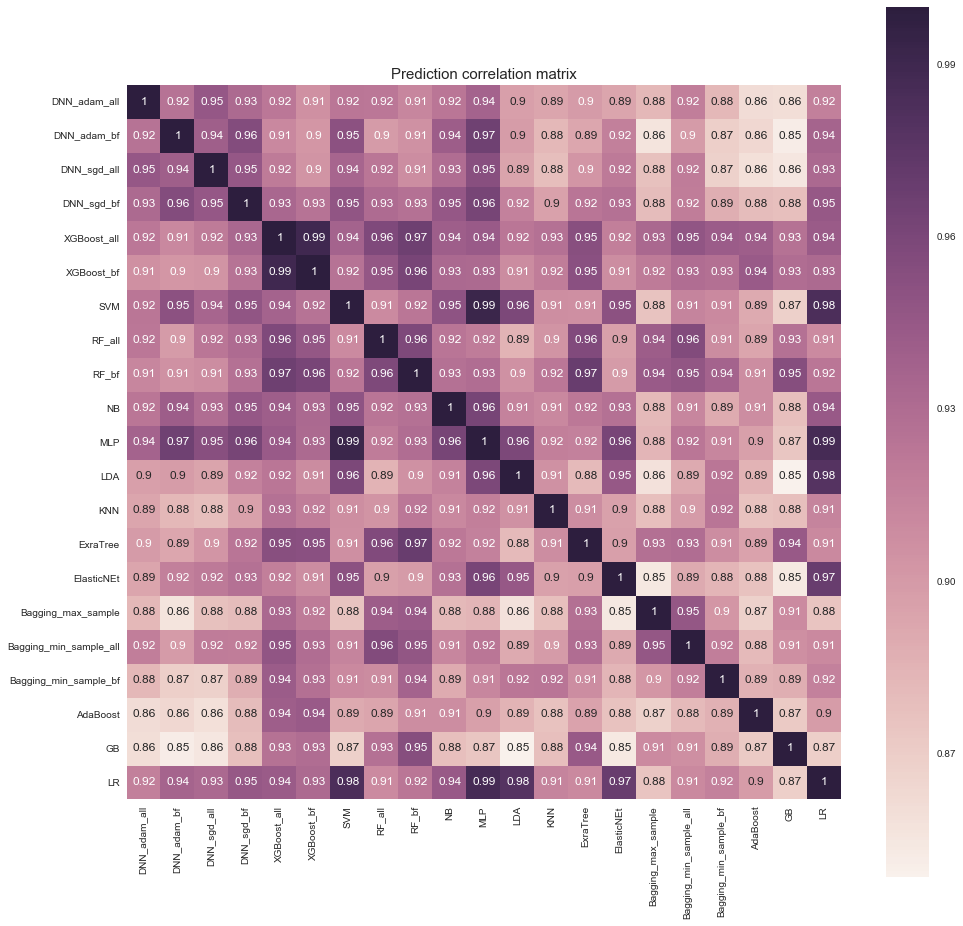

In [10]:
# Compute and display the correlation matrix of predictions
f, ax = plt.subplots(figsize=(16,16))
sns.heatmap(P.corr(), square=True, annot=True)
plt.title("Prediction correlation matrix", fontsize=15)
plt.show()